## Machine Learning Task: Time Series Analysis with Two LSTM Models

Objective: Predict future stock prices (AAPL) using two different LSTM models, preprocess the data, train the models, evaluate their performance, and compare their results.

Prerequisites: Basic knowledge of Python, machine learning, and time series concepts. Familiarity with libraries like pandas, numpy, sklearn, tensorflow, and matplotlib is helpful.

Tools Needed:

    Python 3.x
    Libraries: pandas, numpy, scikit-learn, tensorflow, matplotlib, yfinance
    Install dependencies using: pip install pandas numpy scikit-learn tensorflow matplotlib yfinance

Dataset: Historical daily closing prices of Apple Inc. (AAPL) from 2020 to 2025, obtained via the yfinance library.

**Step 1: Set Up the Environment**

Student Instruction: Install and import the required libraries to prepare your Python environment for data processing, model building, and visualization.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf

**Step 2: Acquire and Inspect the Dataset**

Student Instruction: Download AAPL stock data from 2020 to 2025 using yfinance. Extract the closing price, inspect the data for missing values, and visualize the time series.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


First 5 rows of data:
Price           Close
Ticker           AAPL
Date                 
2020-01-02  72.620827
2020-01-03  71.914810
2020-01-06  72.487854
2020-01-07  72.146935
2020-01-08  73.307518

Data info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, AAPL)  1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB
None


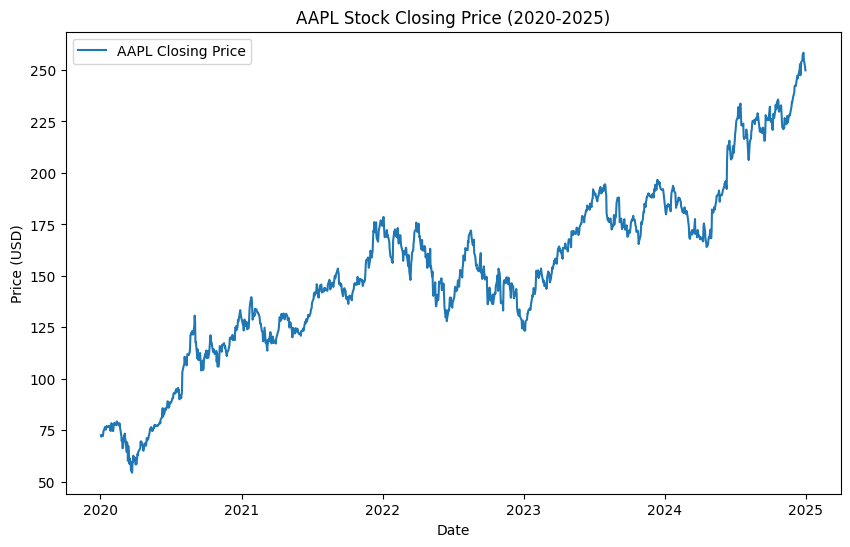

In [ ]:
# Download AAPL stock data
stock_data = yf.download('AAPL', start='2020-01-01', end='2025-01-01')

# Extract closing prices
data = stock_data[['Close']]

# Inspect the data
print("First 5 rows of data:")
print(data.head())
print("\nData info:")
print(data.info())

# Visualize the closing prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='AAPL Closing Price')
plt.title('AAPL Stock Closing Price (2020-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

**Step 3: Preprocess the Data**

Student Instruction: Normalize the data to a [0,1] range, create a supervised learning dataset using a 60-day time window, and split into training (80%) and testing (20%) sets. Reshape the data for LSTM input.

note: you don't have to follow the notes competely! just a reference and one solution to do that

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create supervised learning dataset
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])  # Previous 60 days
        y.append(data[i + time_step, 0])      # Next day's price
    return np.array(X), np.array(y)

# Set time window
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Split into training and testing sets


# Reshape for LSTM [samples, time steps, features]


print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (958, 60, 1)
Testing set shape: (240, 60, 1)


**Step 4: Build and Train Two LSTM Models**

Student Instruction: Create two LSTM models with different architectures. Train both models on the training data and monitor their performance on the test data.
Model 1: Simple LSTM

A basic model with two LSTM layers and dense layers.

In [ ]:
# Model 1: Simple LSTM
model1 = Sequential()
model1.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model1.add(LSTM(50, return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))

# Compile Model 1
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train Model 1 with 20 epochs, 32 batch size

print("\nModel 1 Summary:")
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0487 - val_loss: 0.0031
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0020 - val_loss: 0.0053
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.9660e-04 - val_loss: 0.0011
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.9827e-04 - val_loss: 0.0011
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.4709e-04 - val_loss: 0.0015
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.8736e-04 - val_loss: 0.0010
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.7788e-04 - val_loss: 0.0011
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.2906e-04 - val_loss: 0.0014
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.9037e-04 - val_loss: 8.4742e-04
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.7912e-04 - val_loss: 9.9440e-04
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.4359e-04 - val_loss: 8.8439e-04
Epoch 12/20
30/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

**Model 2: Complex LSTM with Dropout**

A deeper model with dropout layers to prevent overfitting.

In [ ]:
# Model 2: Complex LSTM with Dropout
model2 = Sequential()
model2.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(100, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(50, return_sequences=False))
model2.add(Dense(50))
model2.add(Dense(1))

# Compile Model 2
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train Model 2

print("\nModel 2 Summary:")
model2.summary()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0521 - val_loss: 0.0097
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.0498e-04 - val_loss: 0.0045
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,005 (1.76 MB)

 Trainable params: 154,001 (601.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 308,004 (1.17 MB)

**Step 5: Evaluate and Compare Models**

Student Instruction: Predict prices using both models, inverse-transform predictions to original scale, calculate RMSE for both, and visualize the results. Compare the models based on RMSE and visual fit.

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Model 1 - Train RMSE: 4.36, Test RMSE: 5.39
Model 2 - Train RMSE: 5.39, Test RMSE: 9.40


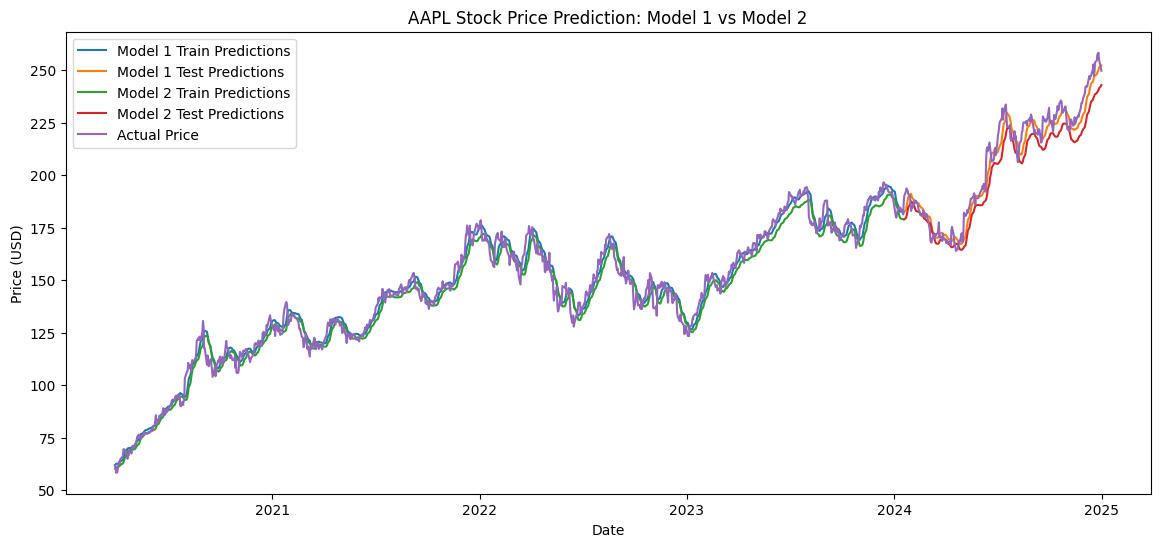

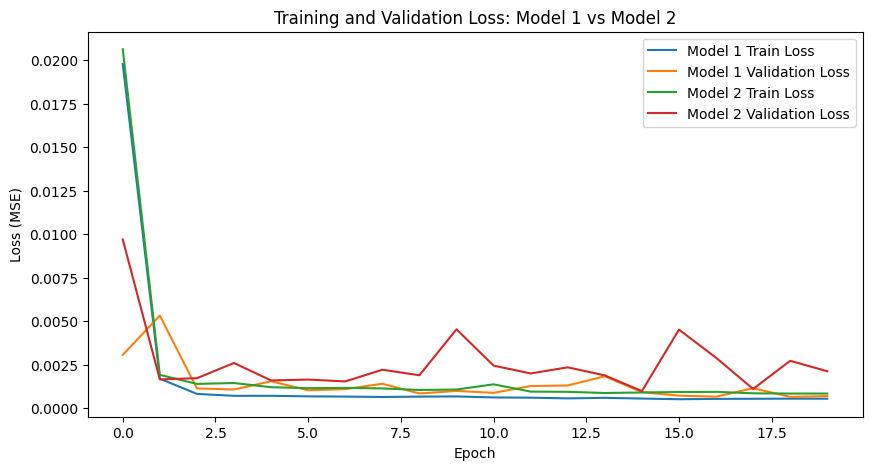

In [ ]:
# Predictions


# Inverse transform predictions


# Calculate RMSE


print(f"Model 1 - Train RMSE: {train_rmse1:.2f}, Test RMSE: {test_rmse1:.2f}")
print(f"Model 2 - Train RMSE: {train_rmse2:.2f}, Test RMSE: {test_rmse2:.2f}")

# Visualize predictions


# Compare training and validation loss
